In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('../1_owid/owid-covid-data.csv')

In [35]:
data1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [20]:
data1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [6]:
data1.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',

In [7]:
data1_US = data1[data1.location == 'United States'].copy()

In [14]:
data1_US.set_index('date', inplace=True)

In [15]:
data1_US.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,USA,North America,United States,19968087.0,227315.0,186106.286,345737.0,3419.0,2387.714,60326.064,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
2021-01-01,USA,North America,United States,20128693.0,160606.0,194737.714,347788.0,2051.0,2506.000,60811.275,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
2021-01-02,USA,North America,United States,20426184.0,297491.0,204865.429,350186.0,2398.0,2611.000,61710.032,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
2021-01-03,USA,North America,United States,20636663.0,210479.0,213437.143,351580.0,1394.0,2637.429,62345.915,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
2021-01-04,USA,North America,United States,20817140.0,180477.0,215408.429,353483.0,1903.0,2663.857,62891.159,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


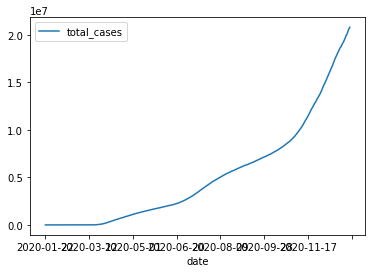

In [17]:
data1_US[["total_cases"]].plot()

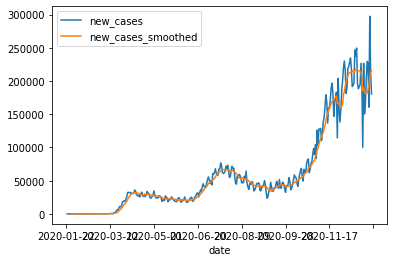

In [19]:
data1_US[["new_cases","new_cases_smoothed"]].plot()

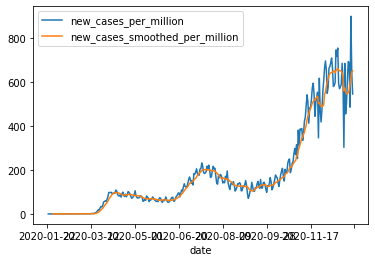

In [30]:
data1_US[['new_cases_per_million', 'new_cases_smoothed_per_million']].plot()

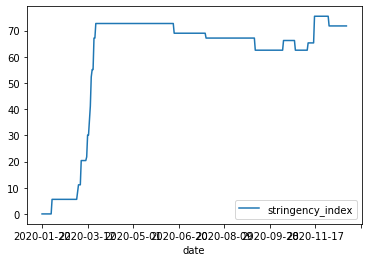

In [32]:
data1_US[["stringency_index"]].plot()

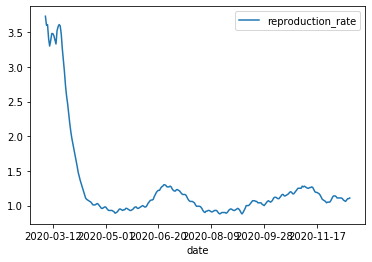

In [31]:
data1_US[['reproduction_rate']].plot()

In [37]:
max(data1.date)

'2021-01-04'

In [45]:
data1_last = data1.groupby('location').last()
data1_last.reset_index(inplace=True)

In [46]:
data1_last = data1_last[['iso_code', 'continent', 'location', 'date', 'total_cases_per_million',
       'total_deaths_per_million', 'reproduction_rate',
       'icu_patients_per_million', 
       'hosp_patients_per_million',
       'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million',
       'total_tests_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]

In [47]:
data1_last.head()

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,weekly_icu_admissions_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2021-01-04,1361.759,57.465,1.10,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
1,ALB,Europe,Albania,2021-01-04,20718.257,416.638,0.93,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2,DZA,Africa,Algeria,2021-01-04,2295.156,63.328,0.75,NaN,NaN,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
3,AND,Europe,Andorra,2021-01-04,106762.441,1087.168,0.94,NaN,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
4,AGO,Africa,Angola,2021-01-04,538.059,12.414,1.03,NaN,NaN,NaN,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581


In [51]:
data1_last.corr()

,total_cases_per_million,total_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests_per_thousand,positive_rate,tests_per_case,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases_per_million,1.000000,0.821672,0.132372,0.676410,0.471060,0.429731,0.314676,0.514812,0.285737,-0.181447,...,0.522991,-0.477707,-0.262125,0.013997,0.609920,0.073749,0.528294,0.304907,0.571350,0.598179
total_deaths_per_million,0.821672,1.000000,0.105197,0.627796,0.450107,0.628388,0.147392,0.163377,0.429962,-0.200459,...,0.312815,-0.464825,-0.243290,-0.013811,0.611969,0.052107,0.476680,0.256773,0.516024,0.540044
reproduction_rate,0.132372,0.105197,1.000000,-0.011595,0.042438,0.028747,0.331596,0.057964,0.189834,0.201397,...,0.082290,-0.068086,-0.177076,-0.192080,0.057671,-0.165590,-0.077003,0.166366,0.092589,0.102539
icu_patients_per_million,0.676410,0.627796,-0.011595,1.000000,0.859218,0.224899,0.472762,-0.187377,0.611910,-0.567968,...,-0.121854,0.521939,0.279856,0.321082,0.361284,0.200336,NaN,0.482111,-0.388847,-0.253921
hosp_patients_per_million,0.471060,0.450107,0.042438,0.859218,1.000000,0.100763,0.541962,-0.278954,0.646949,-0.570338,...,-0.511372,0.421844,0.719400,-0.102193,0.411291,0.485478,NaN,0.593411,-0.737187,-0.683342
weekly_icu_admissions_per_million,0.429731,0.628388,0.028747,0.224899,0.100763,1.000000,0.229316,-0.081314,0.239336,-0.171342,...,-0.123780,-0.307199,0.022232,-0.191793,0.165328,0.041290,NaN,0.497105,-0.094872,0.000427
weekly_hosp_admissions_per_million,0.314676,0.147392,0.331596,0.472762,0.541962,0.229316,1.000000,-0.242386,0.693051,-0.380204,...,-0.514529,0.233026,0.665499,-0.092660,0.431774,0.516111,NaN,0.450655,-0.679873,-0.457767
total_tests_per_thousand,0.514812,0.163377,0.057964,-0.187377,-0.278954,-0.081314,-0.242386,1.000000,-0.227436,0.104691,...,0.670916,-0.300322,-0.221358,0.180801,0.295756,0.038681,0.461545,0.110097,0.461033,0.527603
positive_rate,0.285737,0.429962,0.189834,0.611910,0.646949,0.239336,0.693051,-0.227436,1.000000,-0.267965,...,-0.199836,-0.029293,0.199369,-0.047754,0.154154,0.031091,0.012862,0.126551,-0.085850,-0.028436
tests_per_case,-0.181447,-0.200459,0.201397,-0.567968,-0.570338,-0.171342,-0.380204,0.104691,-0.267965,1.000000,...,0.237683,-0.082173,-0.144766,0.089178,-0.100018,-0.073437,0.253000,-0.037198,0.170202,0.169800


In [104]:
data1.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

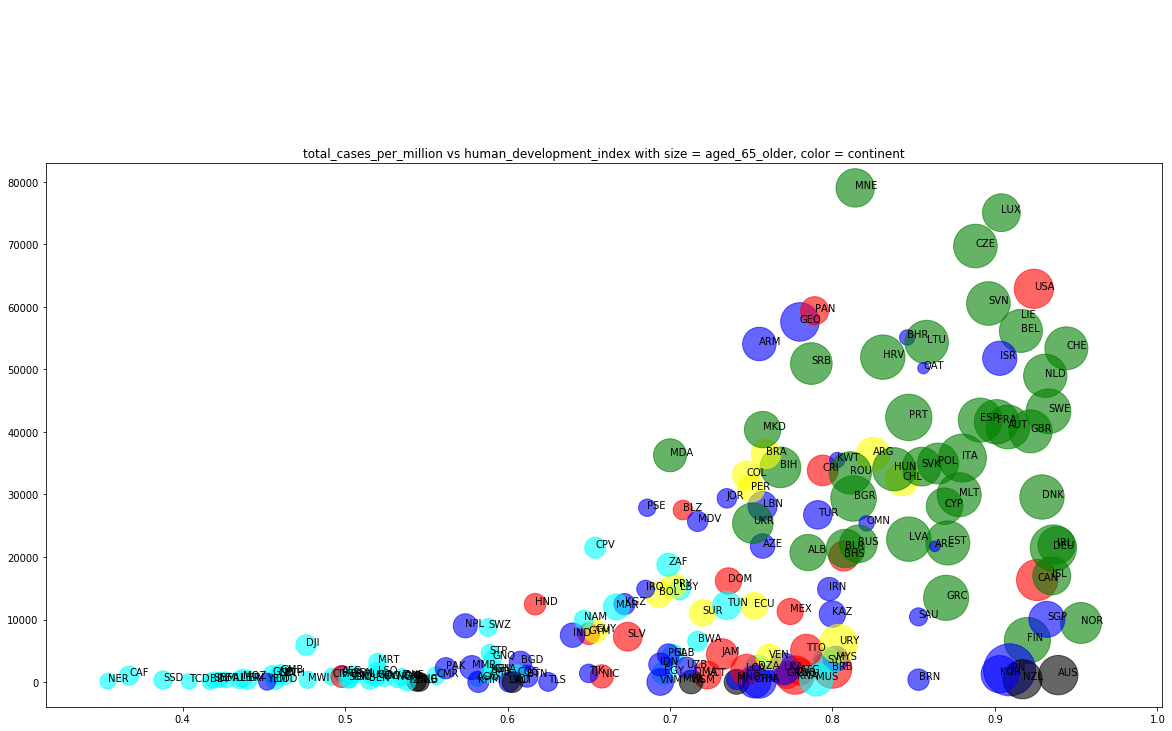

In [128]:
y = data1_last['total_deaths_per_million'] / data1_last['total_cases_per_million']
y = data1_last['total_cases_per_million']
x = data1_last['human_development_index']
n = data1_last['iso_code']
s = data1_last['aged_65_older']

colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'South America':'yellow', 'Africa':'cyan',
       'Oceania':'black', np.nan:'orange'}
plt.figure(figsize=(20,10))
plt.scatter(x, y, s*100, c=data1_last['continent'].map(colors), alpha=0.6)
plt.title('total_cases_per_million vs human_development_index with size = aged_65_older, color = continent')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

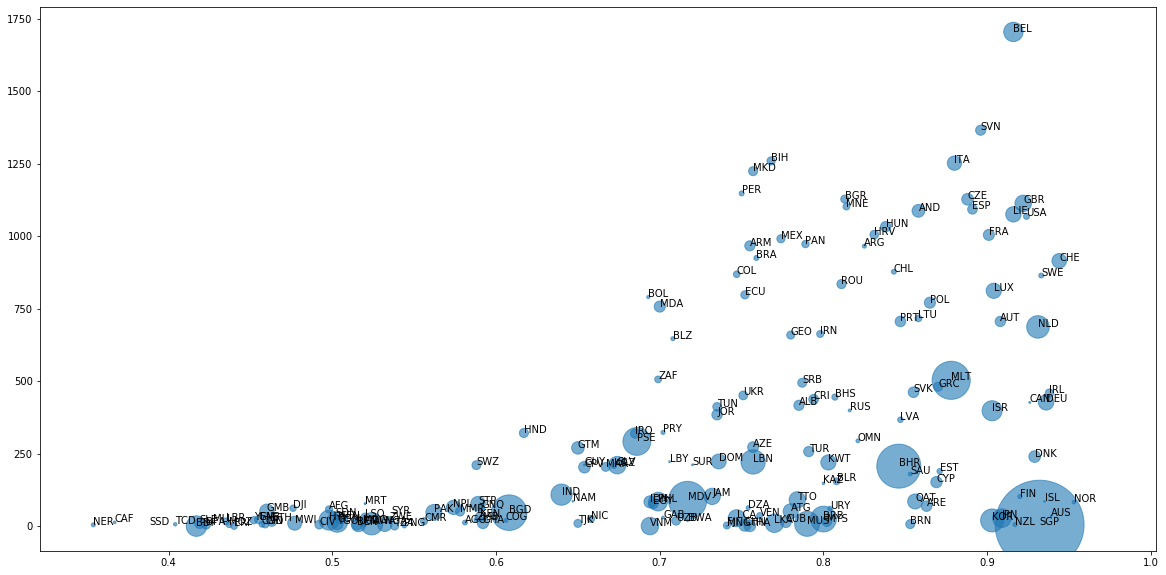

In [86]:
y = data1_last['total_deaths_per_million']
x = data1_last['human_development_index']
n = data1_last['iso_code']
s = data1_last['population_density']


plt.figure(figsize=(20,10))
plt.scatter(x, y, s, alpha=0.6)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

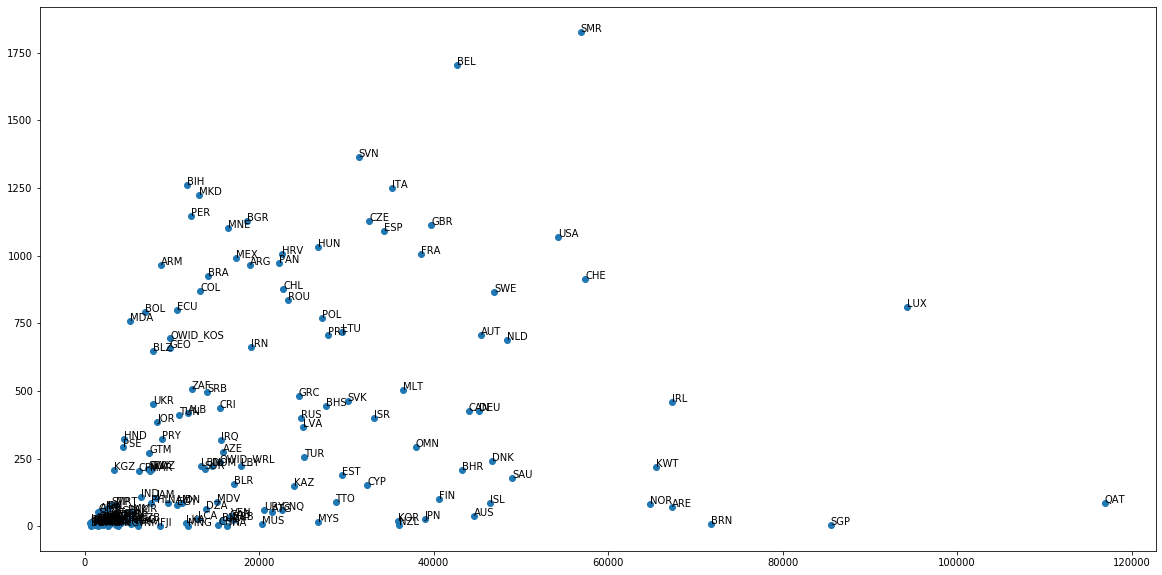

In [74]:
y = data1_last['total_deaths_per_million']
x = data1_last['gdp_per_capita']
n = data1_last['iso_code']
s = data1_last['aged_65_older']

plt.figure(figsize=(20,10))
plt.scatter(x, y)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

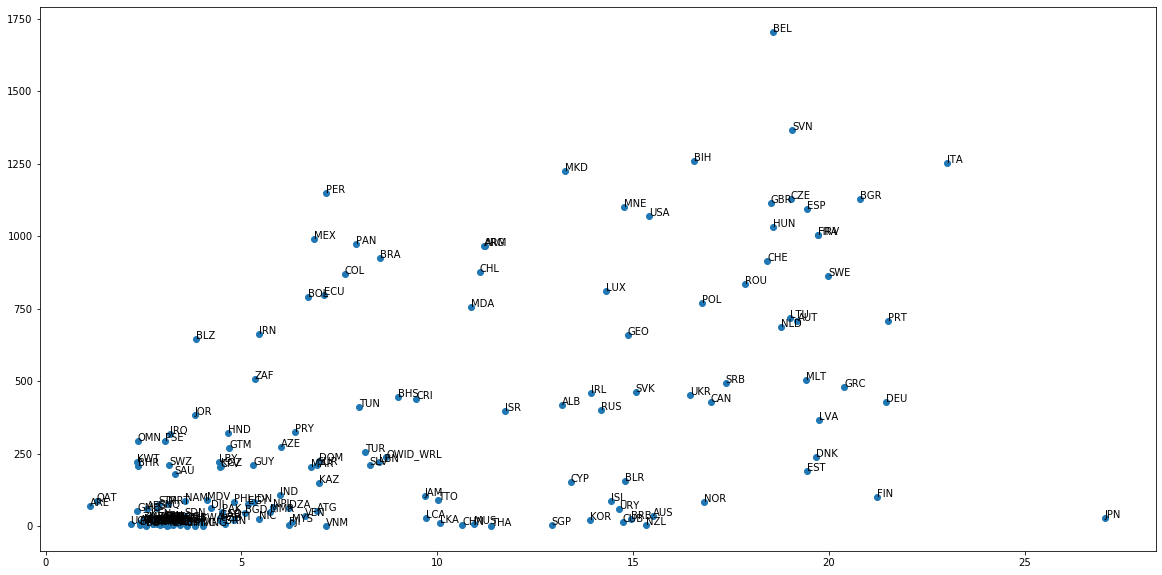

In [70]:
y = data1_last['total_deaths_per_million']
x = data1_last['aged_65_older']
n = data1_last['iso_code']

plt.figure(figsize=(20,10))
plt.scatter(x, y)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

# 2_ecdc/country_response_measures  (only Europe)

In [111]:
data2 = pd.read_csv('../2_ecdc/country_response_measures.csv')

In [114]:
data2.Response_measure.unique() # are they equivalent in different countries?

array(['AdaptationOfWorkplace', 'BanOnAllEvents', 'ClosDaycare',
       'ClosDaycarePartial', 'ClosHigh', 'ClosPrim', 'ClosPrimPartial',
       'ClosPubAny', 'ClosPubAnyPartial', 'ClosSec', 'ClosSecPartial',
       'EntertainmentVenues', 'GymsSportsCentres',
       'HotelsOtherAccommodation', 'IndoorOver100', 'IndoorOver1000',
       'MasksMandatoryAllSpaces', 'MasksMandatoryClosedSpaces',
       'MasksMandatoryClosedSpacesPartial',
       'MasksVoluntaryClosedSpacesPartial', 'MassGather50',
       'MassGatherAll', 'NonEssentialShops', 'NonEssentialShopsPartial',
       'OutdoorOver1000', 'OutdoorOver50', 'OutdoorOver500',
       'PlaceOfWorship', 'PlaceOfWorshipPartial',
       'PrivateGatheringRestrictions', 'RestaurantsCafes', 'SocialCircle',
       'StayHomeGen', 'StayHomeOrder', 'StayHomeOrderPartial',
       'Teleworking', 'EntertainmentVenuesPartial',
       'GymsSportsCentresPartial', 'IndoorOver500',
       'MasksVoluntaryAllSpaces', 'MasksVoluntaryAllSpacesPartial',
       'R

In [120]:
data2.Country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom'], dtype=object)

In [123]:
data2[data2.Country=='Sweden']

,Country,Response_measure,date_start,date_end
1241,Sweden,AdaptationOfWorkplace,2020-07-08,NaN
1242,Sweden,AdaptationOfWorkplacePartial,2020-03-25,2020-07-07
1243,Sweden,BanOnAllEvents,2020-06-14,NaN
1244,Sweden,ClosHigh,2020-03-18,2020-06-15
1245,Sweden,ClosPubAny,2020-07-01,NaN
1246,Sweden,ClosSec,2020-03-18,2020-06-15
1247,Sweden,ClosSecPartial,2020-11-23,NaN
1248,Sweden,IndoorOver50,2020-03-28,2020-06-13
1249,Sweden,IndoorOver500,2020-03-12,2020-03-27
1250,Sweden,MassGather50,2020-03-28,NaN


In [125]:
data2.groupby('Country').count().sort_values('Response_measure')

,Response_measure,date_start,date_end
Country,,,
Sweden,16,16,7
Malta,21,21,9
Norway,26,26,15
Liechtenstein,26,26,20
Croatia,28,28,14
Finland,30,30,20
Denmark,31,31,20
Switzerland,34,34,23
Hungary,35,35,21
